# パーセプトロンとは
***

>ローゼンブラットというアメリカの研究者によって1957年に考案されたアルゴリズムであり、ニューラルネットワークの起源となるアルゴリズムでもある。


**パーセプトロン**は複数の信号を入力として受け取り、ひとつの信号を出力する。そこで、パーセプトロンの信号は「流す/流さない(1/0)」の2値である。  

<img src="./pic/ch1/perceptron.png" width="300">

　出力方法は入力に重みを掛け合わせた値の総和にバイアスを加えたものが閾値を超えた場合に1をそうでなければ0を出力する。これにより1が出力されることを「ニューロンが発火する」と表現され、バイアスは言ってしまえば発火のしやすさであり-θとも表すことができる。また、重みとは各信号の重要性をコントロールするパラメータであり、人口ニューロンの結合強度ともいえる。  
※ここで言うパーセプトロンは正確には人口ニューロン,単純パーセプトロンと呼ばれるものである

**ニューロン**:脳の神経細胞のこと パーセプトロンやニューラルネットワークで結合される各ノードのことでもある 


 実際に上のパーセプトロンによって出力を求める式は式1の通りである。

$$
    \tag{1}
    y = \begin{cases}
    0 & (b + w_1x_1 + w_2x_2 \le 0) \\
    1 & (b + w_1x_1 + w_2x_2 > 0)
    \end{cases}
$$

　**活性化関数(activation function)**は入力信号の総和がどのように活性化(発火)するかを決定する役割がある。式1を活性化関数によって表現すると
 
$$
    \tag{2}
    y = h(b + w_1x_1 + w_2x_2)
$$

$$
    \tag{3}
    h(x) = \begin{cases}
    0 & (x \le 0) \\
    1 & (x > 0)
    \end{cases}
$$

と表現される。式2は、入力信号の総和がh(x)という活性化関数によって変換され、その変換された値が出力yになるということを表している。また、式3で表されるh(x)では、入力が0を超えたら1を、そうでなければ0を返す。

　上記のように、閾値を境にして出力が切り替わる関数を「**ステップ関数**」もしくは「**階段関数**」と呼び、**非連続な関数**である。つまり、パーセプトロンでは活性化関数にステップ関数を利用している。
 
また、式1から分かるように単層パーセプトロンではAND,ORゲートのような線形領域を表現することができるがXORゲートのような非線形領域を表現することはできない。これを可能にするためにはパーセプトロンを多層構造にする必要がある。具体的には、AND,NAND,ORゲートを組み合わせてできるXORゲートを想像するといいだろう。

***

# ニューラルネットワークとは
***

>脳神経を模範とした数学モデルであり、ネットワークを形成する多数の人口ニューロンのシナプス結合強度を変化させることにより問題解決を行う
>引用元:https://www.slideshare.net/yutakakatayama5/ss-203767910

<img src="./pic/ch1/neuralnetwork.png" width="400">

　ニューラルネットワークは上図のように入力層、中間層(もしくは隠れ層)、出力層からなっている。上図のような例は全部で3層から構成されているが、重みを持つ層は実質2層であるため。「2層ネットワーク」と呼ぶ。(3層ネットワークと呼ぶ場合もある)

パーセプトロンでは活性化関数にステップ関数を用いていたが、ニューラルネットワークでよく用いられる活性化関数の一つは、式4で表される「**シグモイド関数**」である。

$$
    \tag{4}
    h(x) = 
    \frac{1}{1 + \exp{(-x)}}
$$

　ステップ関数は非連続であることに対し、シグモイド関数は連続関数である。しかし、下に示すようにグラフで表してみると概形はおよそ似ていると言えるだろう。また、ステップ関数とシグモイド関数はどちらも**非線形関数である**という共通点もある。ニューラルネットワークでは、活性化関数に非線形関数を用いらなければならない。なぜなら、線形関数を用いるとニューラルネットワークで層を深くすることの意味がなくなってしまうからである。複数の層に分けて活性化関数に線形関数を用いたとしても、たった一層に集約できるため中間層の必要がなくなってしまう。つまり、層を重ねることの恩恵を得るためには、活性化関数に非線形関数を用いる必要があるのだ。
 
　また、出力層では活性化関数に「**恒等関数**」を用いる。これは、入力をそのまま出力する関数である。隠れ層の活性化関数をh()と表すのに対し、出力層の活性化関数はσ()で表す。(出力層で利用する活性化関数は、解く問題の性質に応じて決める。例として、回帰問題では恒等関数、2クラス分類問題ではシグモイド関数、多クラス分類では**ソフトマックス関数**を使うのが一般的である)
 
　ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。(ただし、前述の通り問題の種類によって活性化関数を使い分ける必要がある)
 
**分類問題**:人の写った画像から、その人が男性か女性のどちらであるかを分類するような問題  
**回帰問題**:ある入力データから、(連続的な)数値の予測を行うような問題

**恒等関数**:入力をそのまま出力  
**ソフトマックス関数**:以下の式で表される  

$$
    \tag{5}
    y_k = \frac{exp(a_k)}{\sum^{n}_{i=1}(a_i)}
$$

ここでは、出力層がn個あるとして、k番目の出力$ y_k $を求める計算式を表している。式5に示したように、ソフトマックス関数の分子は入力信号$ a_k $の指数関数、分母はすべての入力信号の指数関数の和から構成される。つまり、出力の各ニューロンがすべての入力信号から影響を受けるようになっている。

ソフトマックス関数を実装する際には、オーバーフローに注意しなければならない。非常に大きな値になりがちなので、その値同士で割算を行うと、数値が不安定な結果となってしまう。その提案策として、分子と分母に同じ値のCという任意の定数を掛けるというものがある。分母と分子に同じ値を掛けるため最終的な結果は変わらない。具体的な式を下に示す。

$$
    \tag{6}
    \begin{eqnarray}
    y_k = \frac{exp(a_k)}{\sum^{n}_{i=1}(a_i)}
        &=& \frac{C exp(a_k)}{C \sum^{n}_{i=1}(a_i)} \\
        &=& \frac{exp(a_k + logC)}{\sum^{n}_{i=1}(a_i + logC)} \\
        &=& \frac{exp(a_k + C')}{\sum^{n}_{i=1}(a_i + C')}
    \end{eqnarray}
$$

式6で述べていることは、ソフトマックス関数の計算を行う際には、何らかの定数を足し引きしても結果は変わらないということだ。ここで、C'にはどのような値を用いてもよいが、入力信号の最大値を用いることが一般的である。

ソフトマックス関数の出力は0から1.0の間の実数となる。また、ソフトマックス関数の出力の総和は1となる、つまり、この性質のおかげでソフトマックス関数の出力を**確率**として解釈することができる。よって、ソフトマックス関数を用いることで、問題に対して確率的あるいは統計的な対応ができる。  
　ここで注意しなければならないのは、ソフトマックス関数を用いても各要素の大小関係は変わらないという点だ。これは、指数関数が単調増加するという性質に起因しており、そのため各入力信号ごとに大小関係を調整することは出来ないのである。  
 
　ニューラルネットワークのクラス分類では、一般的に出力の一番大きいニューロンに相当するクラスだけを認識結果とする。そのため、ニューラルネットワークが分類を行う際には、出(確率の表示などをせず、分類のみを行うのであれば)力層のソフトマックス関数を省略することができる。実際の問題では、どうしても計算量が多くなりがちなソフトマックス関数を省略するのが一般的である。
 
　出力層のニューロンの数は、解くべき問題に応じて適宜決める必要がある。クラス分類を行う問題では、出力層のニューロンの数は分類したいクラスの数に設定するのは一般的である。
 
損失関数  
回帰問題: 平均二乗誤差など  
分類問題: 交差エントロピー


# ニューラルネットワークの流れ
***

## 基本的な流れ

ここでは簡単なモデルを元にニューラルネットワークでの学習の流れを確認する。今回用いるモデルは以下とする。また、結合の種類は全結合(アフィン)とする。

<img src="./pic/neural_network.png" width="400">

### ①入力から各ノードごとに数値を算出する(線形変換)
このフェーズでは、入力ベクトルを$ h_0 $とした時に、重み行列$ W_{xy} $とバイアスベクトル$ b_1 $によって以下のような線形変換を行う。

$$
    \tag{1}
    u_1 = W_{xy}h_0 + b_1
$$

式1を元に、モデルに値を割り振って計算してみる。  
図は以下の通りである。

<img src="./pic/neural_network2.png" width="400">

図からも分かるように、ニューラルネットワークでは式1のような線形変換が行われていることが分かる。これをより具体的に式で表すと、

$$
    \tag{2}
    \begin{eqnarray}
    u_{11} &=& w_{11}h_{01} + w_{12}h_{02} + w_{13}h_{03} + b_1 \\
    u_{12} &=& w_{21}h_{01} + w_{22}h_{02} + w_{23}h_{03} + b_2 \\
    \end{eqnarray}
$$

また、式2を式1と等価にするには、

$$
    \begin{eqnarray}
    h_0 &=& 
        \left[ \begin{matrix}
        h_{01} \\
        h_{02} \\
        h_{03}
    \end{matrix} \right] \tag{3} \\
    w_{10} &=& 
        \left[ \begin{matrix}
        w_{11} & w_{12} & w_{13} \\
        w_{21} & w_{22} & w_{23}
        \end{matrix} \right] \tag{4} \\
    b_1 &=& 
        \left[ \begin{matrix}
        b_{1} \\
        b_{2} 
        \end{matrix} \right] \tag{5} \\
    u_1 &=& 
        \left[ \begin{matrix}
        u_{11} \\
        u_{12} 
        \end{matrix} \right] \tag{6}
    \end{eqnarray}
$$

とすることで証明できるだろう。

### ②活性化関数によって算出値を変換する(非線形変換)
フェーズ1では入力ベクトル、シナプス結合強度(結合重み)、バイアスを用いて出力ベクトル$ u $を導き出した。このフェーズでは、前フェーズで導き出した出力を非線形変換を行い線形では表現できない非線形な集合の分類を行う。簡単な例としてはXORゲートの表現などが挙げられるだろう。ORゲートANDゲートはそれぞれ線形な関数で表現可能だが、XORゲートはこれらを組み合わせて表現される。ニューラルネットワークも同じように非線形な変換を繰り返して、多クラスの分類のような分類問題や売上予測のような回帰問題を解決などを行う。

ここで非線形変換に用いる関数を**活性化関数**という。活性化関数にはいくつかの種類がある。また、活性化関数を$ a() $と表し、その出力結果を$ h $とすると

$$
    \tag{7}
    h_{xy} = a(u_{xy})
$$

というように表される。ここで、$ h $は活性値と呼ばれ、次に層が続いているのであればその層への入力となる。

<img src="./pic/neural_network3.png" width="400">

### ③1と2を中間層の数だけ行い最終的な値を算出する
1. 

# 実際にニューラルネットワークを構築・学習してみる
***

本項目では、実際にデータを使用しニューラルネットワークの構築および学習を行っていく。その中で以下のような目標を立てた。

1. 実際にニューラルネットワークを構築する
1. トレーニングデータとテストデータを作成する
1. 実施する問題に応じた損失関数や目的関数を吟味する
1. フィッティングを行い、層の数や結合について吟味し、最適化を行う(できるだけ)

では、以降で実際にこれらのプログラムを作成していく。今回実際に解決を行う問題としては「ゲームの売り上げからの新規ゲーム評価」について行っていく。問題の種類としては、回帰問題となるため活性化関数は恒等関数(入力をそのまま返す|$ y = x $)を用いる。また、損失関数には平均二乗誤差を用いオプティマイザには確率的勾配降下法を、評価関数には平均絶対誤差を用いていく。

https://www.tensorflow.org/tutorials/keras/regression?hl=ja

In [1]:
# データの準備
import pandas as pd

df = pd.read_csv("./Datasets/vgsales.csv")
print(df)

del df["Rank"]
del df["Name"]
del df["Year"]
del df["Genre"]
del df["Publisher"]
del df["Platform"]
print(df)
#df["Genre"] = df["Genre"].astype(str)
#df["Publisher"] = df["Publisher"].astype(str)

#カテゴリをワンホットエンコーディングでダミー変数に変換
df = pd.get_dummies(df)
print(df.isna().sum())
# 欠損値を除外
df = df.dropna(how="any")

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("Global_Sales")
train_stats = train_stats.transpose()

print(train_stats)

train_labels = train_dataset.pop('Global_Sales')
test_labels = test_dataset.pop('Global_Sales')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [112]:
# データの準備
import pandas as pd

df = pd.read_csv("./Datasets/bmw.csv")

del df["model"]

print(df)
#df["Genre"] = df["Genre"].astype(str)
#df["Publisher"] = df["Publisher"].astype(str)

#カテゴリをワンホットエンコーディングでダミー変数に変換
df = pd.get_dummies(df)
print(df.isna().sum())
# 欠損値を除外
df = df.dropna(how="any")

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()

print(train_stats)

train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

       year  price transmission  mileage fuelType  tax   mpg  engineSize
0      2014  11200    Automatic    67068   Diesel  125  57.6         2.0
1      2018  27000    Automatic    14827   Petrol  145  42.8         2.0
2      2016  16000    Automatic    62794   Diesel  160  51.4         3.0
3      2017  12750    Automatic    26676   Diesel  145  72.4         1.5
4      2014  14500    Automatic    39554   Diesel  160  50.4         3.0
...     ...    ...          ...      ...      ...  ...   ...         ...
10776  2016  19000    Automatic    40818   Diesel  150  54.3         2.0
10777  2016  14600    Automatic    42947   Diesel  125  60.1         2.0
10778  2017  13100       Manual    25468   Petrol  200  42.8         2.0
10779  2014   9930    Automatic    45000   Diesel   30  64.2         2.0
10780  2017  15981    Automatic    59432   Diesel  125  57.6         2.0

[10781 rows x 8 columns]
year                      0
price                     0
mileage                   0
tax           

In [113]:
# ニューラルネットワークを構築
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

normed_train_data.drop(1)
N=normed_train_data.shape[1]

def regressionModel():
    model = keras.Sequential()
    model.add(Dense(64, activation='relu', input_dim = N))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    #モデルのコンパイル(mse:平均二乗誤差, sgd:確率的勾配降下法, mae:平均絶対誤差)
    model.compile(loss="mse", optimizer="rmsprop",metrics=["mae"])
    model.summary()

    return model

model = regressionModel()

model.fit(normed_train_data ,train_labels, epochs=10, batch_size=32,verbose=0)
score = model.evaluate(normed_test_data, test_labels, batch_size=1)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_146 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2156/2156 [==============================] - 1s 370us/step - loss: 31194400.0000 - mae: 3858.7129


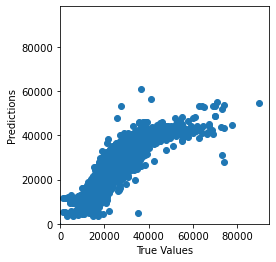

In [114]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

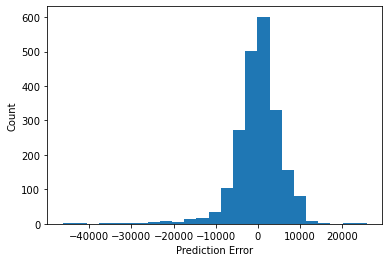

In [115]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")